### Climate Model Simulation Crashes Data Set 

In [10]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import deque
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet ,LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, zero_one_loss
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,GridSearchCV, RandomizedSearchCV, cross_val_score
%matplotlib inline

In [85]:
#reading the dataset 

climate_data=pd.read_csv('climate.csv')
X = climate_data.iloc[:,2:20].values
y = climate_data['outcome'].values

# Splitting the dataset in 25% train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [86]:
print(X.shape)
print(y.shape)

(540, 18)
(540,)


In [87]:
climate_data.head()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,2,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,3,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,4,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,5,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


#### Some initial data analysis 

In [88]:
climate_data['outcome'].sum()

494

In [89]:
climate_data.describe()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,2.000000,90.500000,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,...,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,156.028843,0.817254,52.008901,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,...,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,1.000000,1.000000,1.000000,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,...,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,135.750000,1.000000,45.750000,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,...,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,270.500000,2.000000,90.500000,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,...,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,405.250000,3.000000,135.250000,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,...,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,540.000000,3.000000,180.000000,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,...,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


In [90]:
climate_data.keys()

Index(['Unnamed: 0', 'Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3',
       'vconst_4', 'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl', 'outcome'],
      dtype='object')

In [91]:
featurenames=["vconst_corr","vconst_2","vconst_3","vconst_4","vconst_5","vconst_7","ah_corr","ah_bolus",
             "slm_corr","efficiency_factor","tidal_mix_max","vertical_decay_scale","convect_corr","bckgrnd_vdc1",
              "bckgrnd_vdc_ban","bckgrnd_vdc_eq","bckgrnd_vdc_psim","Prandtl"]
           

#### Step 1                                        Visualize the data 


In [92]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [93]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
x_pca = pca.transform(scaled_data)

In [95]:
scaled_data.shape

(540, 18)

In [96]:
x_pca.shape

(540, 2)

I've ' reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0,0.5,'Second Principal Component')

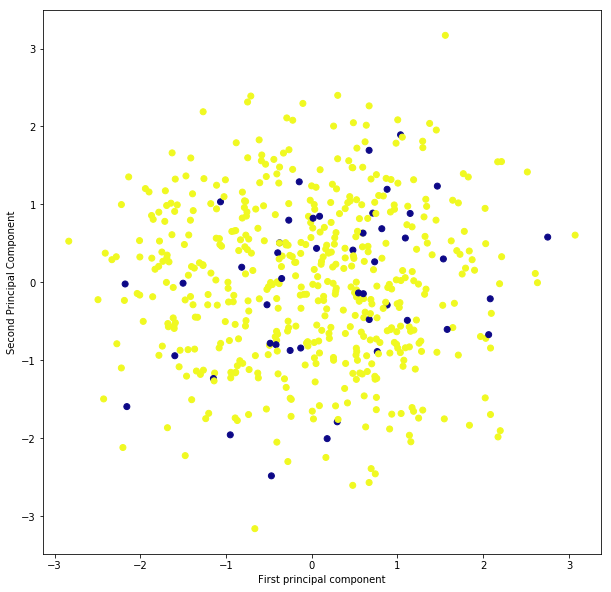

In [97]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=climate_data['outcome'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

#### Not clear sepration between two variables 

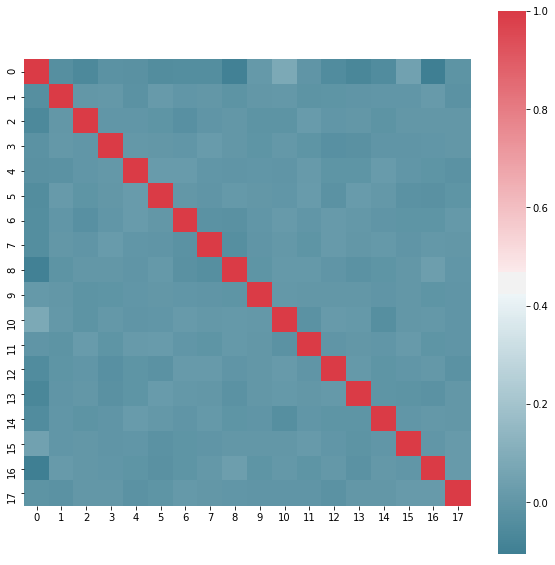

In [98]:
## correlation 
df1 = pd.DataFrame(X)

corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

####  If we look at figure above there is no coorelation between two variables, it means predictors are good for predictions

In [ ]:
#vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,
#ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,
#vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome

#### Step 2 Model 1  DT classifier 


In [159]:
## Decision Trees for cancer

#We'll start just by training a single decision tree.

error_rate_testing_sciktlearn_cancer_decisiontree=[]

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Prediction and Evaluation 

#Let's evaluate our decision tree.
predictions_dt_climate = dtree.predict(X_test)

Test_error_climate_dt=zero_one_loss(y_test,predictions_dt_climate)
Accuracy_test_climate_dt=1-Test_error_climate_dt

print('Test error for decision tree for climate data  = %f' % Test_error_climate_dt)
print('Test Accuracy for decision tree for climate data  = %f' % Accuracy_test_climate_dt)

Test error for decision tree for climate data  = 0.096296
Test Accuracy for decision tree for climate data  = 0.903704


In [100]:
predictions_dt_climate.shape

(135,)

#### Step 3 Model 2 random Forest 

In [161]:
# random forest model 

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
smse = sum(rfc_pred != y_test) / len(y_test)

Accuracy = 1-smse

#print('Test error = %f' % smse)
print('Accuracy = %f' % Accuracy)
print('Error = %f' % error)
error=1-Accuracy

Accuracy = 0.925926
Error = 0.066667


In [102]:
rfc.score(X_test,y_test)

0.92592592592592593

#### Step 4 Model 3 Cross Validation 

In [179]:
n_estimators = [100,200,1000]
max_depth = [2,5,8,10]
max_features = [1,5,8,10,12,15]
results = pd.DataFrame(columns=['n_estimators','max_depth','max_features','mean_score'])

for n in n_estimators:
    for m in max_depth:
        for f in max_features:
            clf = RFC(n_estimators=n,max_depth=m,max_features=f,criterion='entropy')
            scores = cross_val_score(clf,X,y,cv=5)
            results = results.append({'n_estimators':n,'max_depth':m,'max_features':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(5)

,n_estimators,max_depth,max_features,mean_score
32,200.0,5.0,8.0,0.948181
40,200.0,8.0,12.0,0.948164
14,100.0,8.0,8.0,0.948130
15,100.0,8.0,10.0,0.946329
41,200.0,8.0,15.0,0.946329


In [165]:
accuracy = 1-.0740740740741
accuracy

0.9259259259259001

#### Step 5 Model 4 logistic no penealty 

In [104]:
# Model creation with no regularization 
# with all features 

# model creation
basic_model = LogisticRegression()

# fitting the model 
basic_model.fit(X_train,y_train)


# coefficient calculation and error calculation 

sf_basic_model = np.sum(basic_model.coef_/max(basic_model.coef_) >= 1e-6)
v_error_basic_model = np.mean(basic_model.predict(X_test) != y_test)

print('No regularization: no of features: ', sf_basic_model)
print('No regularization: error: ', v_error_basic_model)

No regularization: no of features:  18
No regularization: error:  0.0740740740741


#### Step 6 Model 5 logistic  L1

In [166]:
#penalty l1
model_l1 = LogisticRegression(penalty = 'l1')

# Fitting the model 
model_l1.fit(X_train,y_train)

pred = model_l1.predict(X_test)

# coefficient calculation and error calculation 

sf_model = np.sum(model_l1.coef_/max(model_l1.coef_) >= 1e-6)
v_error = np.mean(model_l1.predict(X_test) != y_test)

accuracy = np.mean(pred==y_test)
# printing the features, and error

print(' L1 regularization: no of features ', sf_model)
print(' L1 regularization: accuracy ', accuracy)

 L1 regularization: no of features  13
 L1 regularization: accuracy  0.948148148148


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


In [106]:
model_l1.coef_

array([[  8.05042384e-04,  -4.89372507e+00,  -4.29905531e+00,
          0.00000000e+00,   6.84316021e-01,   5.14713584e-01,
          4.77820750e-01,   1.49367418e-01,   1.01971731e+00,
          7.43510945e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -2.30986122e+00,   2.61239224e+00,
          0.00000000e+00,   8.14785411e-01,   1.58808121e+00]])

In [149]:
coeff=model_l1.coef_
coeff1=coeff.transpose()

In [150]:
featurenames

['vconst_corr',
 'vconst_2',
 'vconst_3',
 'vconst_4',
 'vconst_5',
 'vconst_7',
 'ah_corr',
 'ah_bolus',
 'slm_corr',
 'efficiency_factor',
 'tidal_mix_max',
 'vertical_decay_scale',
 'convect_corr',
 'bckgrnd_vdc1',
 'bckgrnd_vdc_ban',
 'bckgrnd_vdc_eq',
 'bckgrnd_vdc_psim',
 'Prandtl']

In [151]:

df1 = pd.DataFrame(coeff1)
df2 = pd.DataFrame(featurenames)

df3=pd.concat([df1,df2],axis=1)

# Joining in x1 and x2 

df3[[0]]

,0,0
0,0.000805,vconst_corr
1,-4.893725,vconst_2
2,-4.299055,vconst_3
3,0.000000,vconst_4
4,0.684316,vconst_5
5,0.514714,vconst_7
6,0.477821,ah_corr
7,0.149367,ah_bolus
8,1.019717,slm_corr
9,0.743511,efficiency_factor


#### Step 7 Model 6 logistic  L2

In [144]:
#penalty l2

model_l2 = LogisticRegression(penalty = 'l2')

# Fitting the model 
model_l2.fit(X_train,y_train)

pred = model_l2.predict(X_test)

# coefficient calculation and error calculation 

sf_model = np.sum(model_l2.coef_/max(model_l1.coef_) >= 1e-6)
v_error = np.mean(model_l2.predict(X_test) != y_test)

accuracy = np.mean(pred==y_test)
# printing the features, and error

print(' L2 regularization: no of features ', sf_model)
print(' L2 regularization: error ', accuracy)

 L2 regularization: no of features  17
 L2 regularization: error  0.925925925926


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [153]:


coeff=model_l2.coef_
coeff1=coeff.transpose()
df1 = pd.DataFrame(coeff1)
df2 = pd.DataFrame(featurenames)

df3=pd.concat([df1,df2],axis=1)

# Joining in x1 and x2 

df3[[0]]

,0,0
0,0.002506,vconst_corr
1,-2.984888,vconst_2
2,-2.583999,vconst_3
3,0.419280,vconst_4
4,0.716327,vconst_5
5,0.715729,vconst_7
6,0.634149,ah_corr
7,0.512507,ah_bolus
8,1.107829,slm_corr
9,0.844871,efficiency_factor


 #### Step 8  Model  7 logistic  L1 Backward 

In [ ]:
#### Ref : https://github.com/ubcs3/2017-Fall/blob/master/notes-2017-10-13/notes-2017-10-13-ideas.ipynb

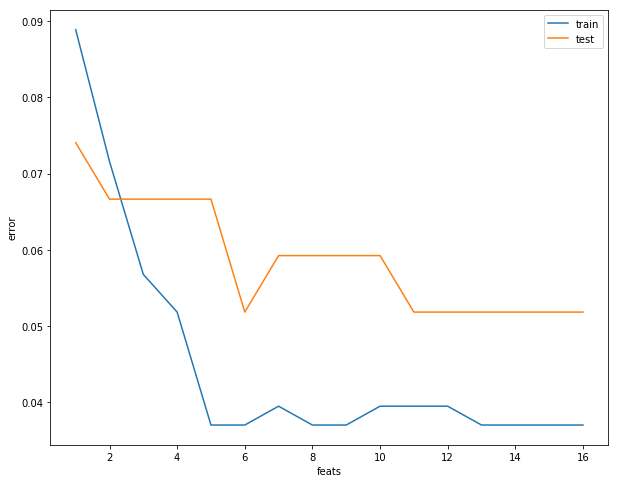

In [169]:

# make an empty list to hold train error, and one to hold test error
trainer_back_L1 = list()
valerr_back_L1 = list()

# make an array of the number of features to sweep through
feats = np.arange(1,17)

# loop over the features, and fit the model each time
# also calculate train and test error
for f in feats:
    rfe = RFE(estimator = Ridge(), n_features_to_select = f)
    rfe.fit(X_train, y_train)
    Xtrain_sel = X_train[:,rfe.support_]
    Xvalidate_sel = X_test[:,rfe.support_]
    
    model_back_l1 = LogisticRegression(penalty = 'l1')

    # Fitting the model 
    model_back_l1.fit(Xtrain_sel,y_train)

# coefficient calculation and error calculation 

    #sf_model_l2 = np.sum(model_l2.coef_/max(model_l2.coef_) >= 1e-6)
    v_error_l1 = np.mean(model_back_l1.predict(Xvalidate_sel) != y_test)
    train_error_l1 = np.mean(model_back_l1.predict(Xtrain_sel) != y_train)
    
    
    trainer_back_L1.append(train_error_l1)
    valerr_back_L1.append(v_error_l1)
      
    
       # plot validation loss
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,17), trainer_back_L1, label="train")
plt.plot(np.arange(1,17), valerr_back_L1, label="test")
plt.xlabel("feats")
plt.ylabel("error")
plt.legend()
plt.show()


In [189]:
# List 
list_backward_L1= {'Features':feats,'Train Error': trainer_back_L1,"Test Error":valerr_back_L1}
list_backward_L1 = pd.DataFrame(list_backward_L1)
list_backward_L1.sort_values(by='Test Error',ascending=True).head(10)

,Features,Test Error,Train Error
5,6,0.051852,0.037037
10,11,0.051852,0.039506
11,12,0.051852,0.039506
12,13,0.051852,0.037037
13,14,0.051852,0.037037
14,15,0.051852,0.037037
15,16,0.051852,0.037037
6,7,0.059259,0.039506
7,8,0.059259,0.037037
8,9,0.059259,0.037037


In [182]:
model_back_l1.coef_

array([[-4.90969184, -4.32554515,  0.        ,  0.6867824 ,  0.50583237,
         0.49366702,  0.1427826 ,  0.99339546,  0.73664286,  0.        ,
         0.        ,  0.        , -2.32217623,  2.60168485,  0.81769441,
         1.56403755]])

In [190]:
model_back_l1.coef_

12

In [167]:
1-0.051852

0.948148

In [180]:

coeff=model_back_l1.coef_
coeff1=coeff.transpose()
df1 = pd.DataFrame(coeff1)
df2 = pd.DataFrame(featurenames)

df3=pd.concat([df1,df2],axis=1)

# Joining in x1 and x2 

df3[[0]]

,0,0
0,-4.909692,vconst_corr
1,-4.325545,vconst_2
2,0.000000,vconst_3
3,0.686782,vconst_4
4,0.505832,vconst_5
5,0.493667,vconst_7
6,0.142783,ah_corr
7,0.993395,ah_bolus
8,0.736643,slm_corr
9,0.000000,efficiency_factor


 #### Step 9  Model  8 logistic  L2  Backward 

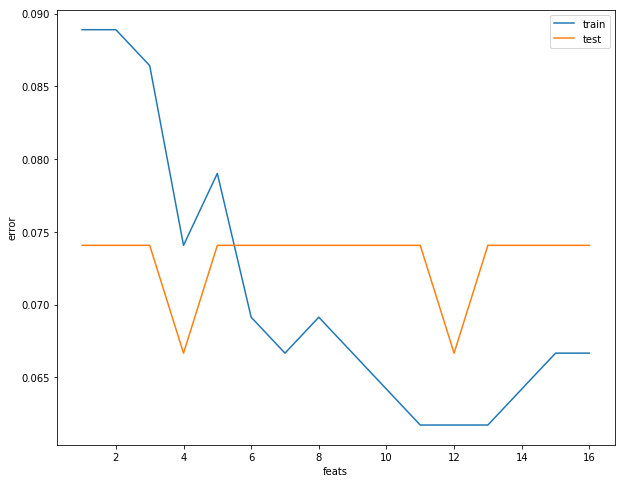

In [191]:
# make an empty list to hold train error, and one to hold test error
trainer_back_L2 = list()
valerr_back_L2 = list()

# make an array of the number of features to sweep through
feats = np.arange(1,17)

# loop over the features, and fit the model each time
# also calculate train and test error
for f in feats:
    rfe = RFE(estimator = Ridge(), n_features_to_select = f)
    rfe.fit(X_train, y_train)
    Xtrain_sel = X_train[:,rfe.support_]
    Xvalidate_sel = X_test[:,rfe.support_]
    
    model_back_l2 = LogisticRegression(penalty = 'l2')

    # Fitting the model 
    model_back_l2.fit(Xtrain_sel,y_train)

# coefficient calculation and error calculation 

    #sf_model_l2 = np.sum(model_l2.coef_/max(model_l2.coef_) >= 1e-6)
    v_error_l2 = np.mean(model_back_l2.predict(Xvalidate_sel) != y_test)
    train_error_l2 = np.mean(model_back_l2.predict(Xtrain_sel) != y_train)
    
    
    trainer_back_L2.append(train_error_l2)
    valerr_back_L2.append(v_error_l2)
      
    
plt.figure(figsize=(10,8))     # plot validation loss
plt.plot(np.arange(1,17), trainer_back_L2, label="train")
plt.plot(np.arange(1,17), valerr_back_L2, label="test")
plt.xlabel("feats")
plt.ylabel("error")
plt.legend()
plt.show()

In [117]:
# List 
list_backward_L2= {'Features':feats,'Train Error': trainer_back_L2,"Test Error":valerr_back_L2}
list_backward_L2 = pd.DataFrame(list_backward_L2)
list_backward_L2.sort_values(by='Test Error').head(5)

,Features,Test Error,Train Error
3,4,0.066667,0.074074
11,12,0.066667,0.061728
0,1,0.074074,0.088889
1,2,0.074074,0.088889
2,3,0.074074,0.086420


In [170]:
1-0.066667

0.933333

### Step 10 Model 9 CV using L1 and L2 penealty

In [175]:
penalty = ['l2','l1']
C = np.arange(1,3,0.1)
fit_intercept = [True,False]
results = pd.DataFrame(columns=['penalty','C','fit_intercept','mean_score'])

for p in penalty:
    for c in C:
        for f in fit_intercept:
            reg = LogisticRegression(penalty=p,C=c,fit_intercept=f)
            scores = cross_val_score(reg,X,y,cv=5)
            results = results.append({'penalty':p,'C':c,'fit_intercept':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(10)

,penalty,C,fit_intercept,mean_score
50,l1,1.5,True,0.962996
72,l1,2.6,True,0.961144
78,l1,2.9,True,0.961144
52,l1,1.6,True,0.961144
76,l1,2.8,True,0.961144
74,l1,2.7,True,0.961144
54,l1,1.7,True,0.961144
70,l1,2.5,True,0.961144
56,l1,1.8,True,0.961144
48,l1,1.4,True,0.961127


In [209]:
re=results.sort_values(by='mean_score',ascending=False).head(10)
pos=re.ix[:,'mean_score':]
pos

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,mean_score
32,0.948181
40,0.948164
14,0.948130
15,0.946329
41,0.946329
22,0.946312
17,0.946312
71,0.946312
59,0.944494
10,0.944477


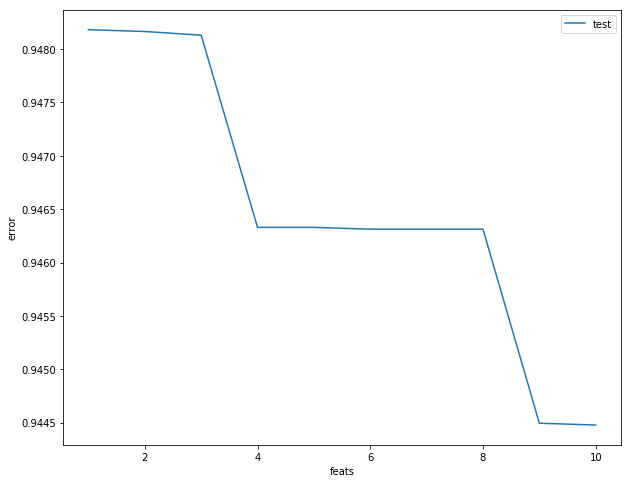

In [212]:
plt.figure(figsize=(10,8))     # plot validation loss
plt.plot(np.arange(1,11), pos, label="test")
plt.xlabel("feats")
plt.ylabel("error")
plt.legend()
plt.show()

####  Just for fun K-nearest neighbors

In [171]:
n_neighbors = range(1,20)
results = pd.DataFrame(columns=['n_neighbors','mean_score'])

for n in n_neighbors:
    clf = KNC(n_neighbors=18)
    scores = cross_val_score(clf,X,y,cv=5)
    results = results.append({'n_neighbors':n,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(5)

,n_neighbors,mean_score
0,1.0,0.914829
10,11.0,0.914829
17,18.0,0.914829
16,17.0,0.914829
15,16.0,0.914829


In [ ]:
# .cient of model which are not zero are selected ....print out the coefficient and check values 

# which features are good to predict 

# binary ...how balance is your data ...and talk about that 

# visualizatiob on bar graph 

In [229]:
pwd

'/Users/prash/UBC-17/block4/573-FM/climate_analysis'

In [228]:

climate_data=pd.read_csv('climate.csv')

X_more = climate_data[["vconst_corr","vconst_2","vconst_3","vconst_5","vconst_7","ah_corr",
          "ah_bolus","slm_corr","efficiency_factor","bckgrnd_vdc1","bckgrnd_vdc_ban","bckgrnd_vdc_psim","Prandtl"]]

y_more = climate_data['outcome'].values
# Splitting the dataset in 25% train and test 

X_train, X_test, y_train, y_test = train_test_split(X_more, y_more, test_size=0.25)

#penalty l1
model_l1 = LogisticRegression()

# Fitting the model 
model_l1.fit(X_train,y_train)

pred = model_l1.predict(X_test)

# coefficient calculation and error calculation 

sf_model = np.sum(model_l1.coef_/max(model_l1.coef_) >= 1e-6)
v_error = np.mean(model_l1.predict(X_test) != y_test)

accuracy = np.mean(pred==y_test)
# printing the features, and error

print(' L1 regularization: no of features ', sf_model)
print(' L1 regularization: accuracy ', accuracy)


# random forest model 

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
smse = sum(rfc_pred != y_test) / len(y_test)

Accuracy = 1-smse

#print('Test error = %f' % smse)
print('Accuracy = %f' % Accuracy)
print('Error = %f' % error)
error=1-Accuracy
model_l1.coef_

 L1 regularization: no of features  13
 L1 regularization: accuracy  0.933333333333
Accuracy = 0.933333
Error = 0.096296


array([[-2.89935967, -2.65498655,  0.07467209,  0.96636284,  0.87928282,
         0.5152168 ,  0.43133686,  0.92506381, -0.11144326,  1.91990146,
         0.23400516,  0.86062432,  0.13526993]])

In [ ]:
['vconst_corr',
 'vconst_2',
 'vconst_3',
 'vconst_5',
 'vconst_7',
 'ah_corr',
 'ah_bolus',
 'slm_corr',
 'efficiency_factor',
 'bckgrnd_vdc1',
 'bckgrnd_vdc_ban',
 'bckgrnd_vdc_psim',
 'Prandtl']